# Chayanin Kongsareekul 6532035021

# Exercise 3: Password Brute-Force Time Analysis

In [1]:
%pip install bcrypt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import hashlib
import bcrypt

# SHA1
m = hashlib.sha1(b"Chulalongkorn").hexdigest()
print(m)

# MD5
m = hashlib.md5(b"Chulalongkorn").hexdigest()
print(m)

# bcrypt
salt = bcrypt.gensalt()
m = bcrypt.hashpw(b"Chulalongkorn", salt)
print(m)

ca8a68498ae67cd14c15f5ebf043633224005759
46fa3b56c660faff420190c18c98a56b
b'$2b$12$1.zGoEbrQNarCH0DMaJsfu2rCd5OO4Dva8HoNK20xGY1eoX.JOqzm'


# Exercise 1

## func: permu()

In [3]:
def permu(target_hash, original_word, current_state, current_word):
    if current_state == len(original_word):
        if hashlib.sha1(current_word.encode('utf-8')).hexdigest() == target_hash:
            print(f"Password found: {current_word}")
            return current_word
        return ""
    
    substitutions = {
        'a': ['a', 'A', '4', '@'],
        'b': ['b', 'B', '8'],
        'c': ['c', 'C', '('],
        'd': ['d', 'D'],
        'e': ['e', 'E', '3'],
        'f': ['f', 'F'],
        'g': ['g', 'G', '9', '6'],
        'h': ['h', 'H', '#'],
        'i': ['i', 'I', '1', '!', '|'],
        'j': ['j', 'J'],
        'k': ['k', 'K'],
        'l': ['l', 'L', '1', '|', '!'],
        'm': ['m', 'M'],
        'n': ['n', 'N'],
        'o': ['o', 'O', '0'],
        'p': ['p', 'P'],
        'q': ['q', 'Q'],
        'r': ['r', 'R'],
        's': ['s', 'S', '5', '$', 'z', 'Z'],
        't': ['t', 'T', '7', '+'],
        'u': ['u', 'U', 'v', 'V'],
        'v': ['v', 'V', 'u', 'U'],
        'w': ['w', 'W'],
        'x': ['x', 'X', '*'],
        'y': ['y', 'Y'],
        'z': ['z', 'Z', '2', 's', 'S'],
        '0': ['0', 'o', 'O'],
        '1': ['1', 'i', 'I', 'l', 'L', '!', '|'],
        '2': ['2', 'z', 'Z'],
        '3': ['3', 'e', 'E'],
        '4': ['4', 'a', 'A', '@'],
        '5': ['5', 's', 'S', '$'],
        '6': ['6', 'g', 'G'],
        '7': ['7', 't', 'T'],
        '8': ['8', 'b', 'B'],
        '9': ['9', 'g', 'G']
    }

    current_char = original_word[current_state]
    for substitute in substitutions.get(current_char, [current_char]):
        correct_password = permu(target_hash, original_word, current_state + 1, current_word + substitute)
        if correct_password != "":
            return correct_password
    return ""


## func: crack_password()

In [4]:
def crack_password(word, target_hash):
    correct_password = permu(target_hash, word, 0, "")
    if correct_password != "":
        return correct_password
    return ""

## Main

In [5]:
### Main

import requests

target_sha1_hash = "d54cc1fe76f5186380a0939d2fc1723c44e8a5f7"
url = 'https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Common-Credentials/10k-most-common.txt'
word_list = requests.get(url).text.splitlines()


for word in word_list:
    correct_password = crack_password(word, target_sha1_hash)
    if correct_password != "":
        print(f"Successfully cracked password: {correct_password}")
        break

Password found: ThaiLanD
Successfully cracked password: ThaiLanD


## Answer 1: ThaiLanD

# Exercise 2

Password Hashing Performance Experiment
Testing MD5, SHA-1, and bcrypt with fixed time approach

Downloaded 10000 words from SecLists
Testing each algorithm for 10 seconds
Testing MD5...
  Total hashes: 8,854,238
  Rate: 885,424 hashes/second

Testing SHA-1...
  Total hashes: 9,741,767
  Rate: 974,176 hashes/second

Testing bcrypt...
  Total hashes: 27
  Rate: 3 hashes/second



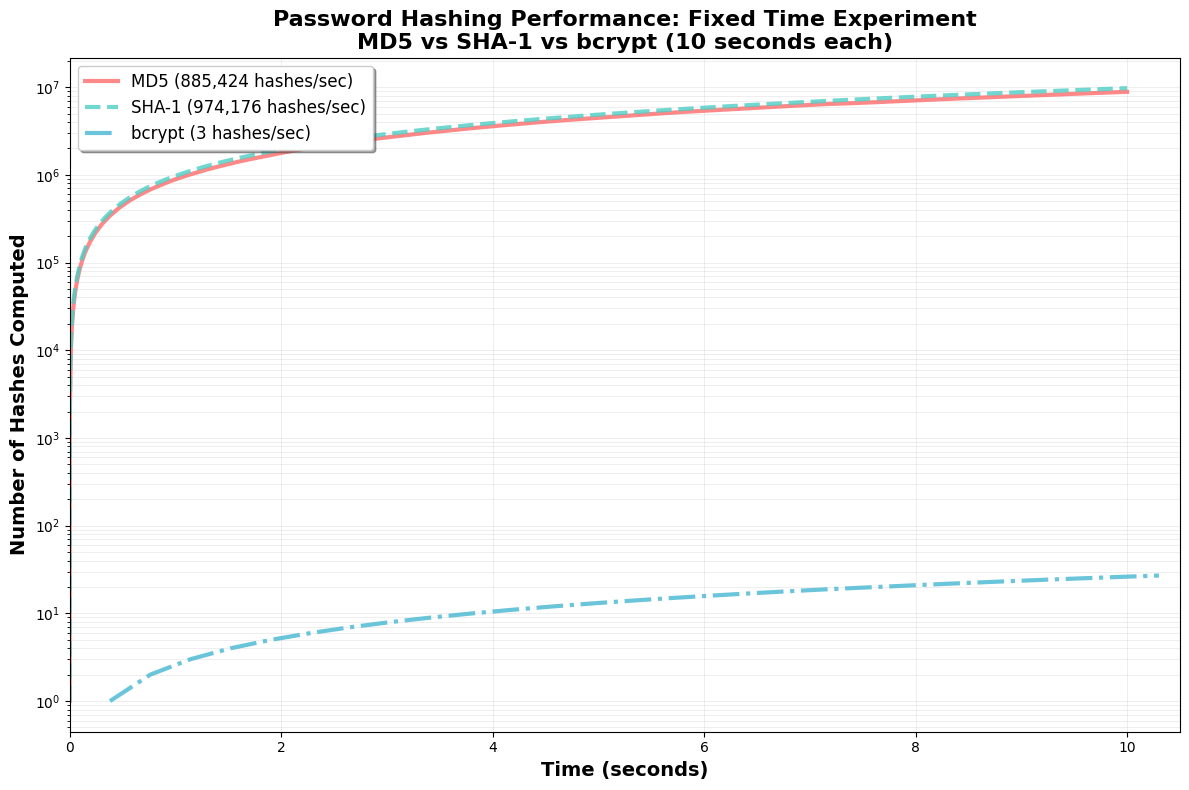


RESULTS SUMMARY
MD5: 8,854,238 hashes in 10 seconds
SHA-1: 9,741,767 hashes in 10 seconds
bcrypt: 27 hashes in 10 seconds

MD5 computed 327,935x more hashes than bcrypt


In [6]:
import hashlib
import bcrypt
import time
import matplotlib.pyplot as plt
import numpy as np
import requests

def download_wordlist():
    url = "https://raw.githubusercontent.com/danielmiessler/SecLists/master/Passwords/Common-Credentials/10k-most-common.txt"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        words = response.text.strip().split('\n')
        print(f"Downloaded {len(words)} words from SecLists")
        return words[:10000]
    except Exception as e:
        print(f"Error downloading wordlist: {e}")
        print("Using fallback wordlist...")
        return [f"password{i}" for i in range(10000)]

def run_line_chart_test():
    print("Downloading passwords for testing...")
    passwords = download_wordlist()
    
    test_duration = 10
    algorithms = ["MD5", "SHA-1", "bcrypt"]
    
    print(f"Testing each algorithm for {test_duration} seconds")
    print("=" * 60)
    
    all_results = {}
    
    for algorithm in algorithms:
        print(f"Testing {algorithm}...")
        
        start_time = time.time()
        hash_count = 0
        word_index = 0
        time_points = []
        cumulative_hashes = []
        
        while (time.time() - start_time) < test_duration:
            password = passwords[word_index % len(passwords)]
            
            if algorithm == "MD5":
                hashlib.md5(password.encode('utf-8', errors='ignore')).hexdigest()
            elif algorithm == "SHA-1":
                hashlib.sha1(password.encode('utf-8', errors='ignore')).hexdigest()
            elif algorithm == "bcrypt":
                salt = bcrypt.gensalt(rounds=12)
                bcrypt.hashpw(password.encode('utf-8', errors='ignore'), salt)
            
            hash_count += 1
            word_index += 1
            
            current_time = time.time() - start_time
            time_points.append(current_time)
            cumulative_hashes.append(hash_count)
        
        actual_time = time.time() - start_time
        rate = hash_count / actual_time
        
        all_results[algorithm] = {
            'time_points': time_points,
            'cumulative_hashes': cumulative_hashes,
            'total_hashes': hash_count,
            'rate': rate
        }
        
        print(f"  Total hashes: {hash_count:,}")
        print(f"  Rate: {rate:,.0f} hashes/second")
        print()
    
    return all_results, test_duration

def create_line_chart(results, test_duration):
    
    plt.figure(figsize=(12, 8))
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    line_styles = ['-', '--', '-.']
    
    for i, (algorithm, data) in enumerate(results.items()):
        plt.plot(data['time_points'], data['cumulative_hashes'],
                color=colors[i],
                linestyle=line_styles[i],
                linewidth=3,
                label=f"{algorithm} ({data['rate']:,.0f} hashes/sec)",
                alpha=0.8)
    
    plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Hashes Computed', fontsize=14, fontweight='bold')
    plt.title(f'Password Hashing Performance: Fixed Time Experiment\n'
              f'MD5 vs SHA-1 vs bcrypt ({test_duration} seconds each)', 
              fontsize=16, fontweight='bold')
    
    plt.yscale('log')
    plt.grid(True, alpha=0.3, which="both", ls='-', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
    plt.xlim(0, test_duration * 1.05)
    
    plt.tight_layout()
    plt.show()
    
    print("\nRESULTS SUMMARY")
    print("=" * 50)
    for algorithm, data in results.items():
        print(f"{algorithm}: {data['total_hashes']:,} hashes in {test_duration} seconds")
    
    md5_count = results['MD5']['total_hashes']
    bcrypt_count = results['bcrypt']['total_hashes']
    ratio = md5_count / bcrypt_count if bcrypt_count > 0 else float('inf')
    print(f"\nMD5 computed {ratio:,.0f}x more hashes than bcrypt")

if __name__ == "__main__":
    try:
        print("Password Hashing Performance Experiment")
        print("Testing MD5, SHA-1, and bcrypt with fixed time approach\n")
        
        results, duration = run_line_chart_test()
        create_line_chart(results, duration)
        
    except KeyboardInterrupt:
        print("\nTest interrupted by user")
    except Exception as e:
        print(f"\nError during testing: {e}")
        print("Make sure you have required packages installed:")
        print("pip install bcrypt matplotlib requests numpy")

## Answer 2: 
#### MD5: 8,451,422 hashes in 10 seconds
#### SHA-1: 9,819,004 hashes in 10 seconds
#### bcrypt: 27 hashes in 10 seconds

# Exercise 3

In [ ]:
password_lengths = list(range(1, 9))

ex2_rates = {
    'md5': 8854238 / 10,
    'sha1': 9741767 / 10,
    'bcrypt': 27 / 10
}

for algo, rate in ex2_rates.items() :
    print("=" * 50)x
    print(f"For algorithm {algo.upper()}, the rate is {rate:,.0f} hashes/second.")
    print("=" * 50)
    charset_size = 26 + 26 + 10 + 32
    print(f"Character set size: {charset_size} (A-Z, a-z, 0-9, symbols)")
    print("Calculating average time to brute-force (50% of keyspace)...")
    print()
    result = dict()
    first_breakthrough = None
    for length in password_lengths:
        keyspace = charset_size ** length
        avg_attempts = keyspace // 2
        time_seconds = avg_attempts / rate
        
        time_minutes = time_seconds / 60
        time_hours = time_seconds / 3600
        time_days = time_seconds / (3600 * 24)
        time_years = time_seconds / (3600 * 24 * 365)

        if first_breakthrough is None and time_years >= 1:
            first_breakthrough = length

        if time_seconds < 60:
            time_str = f"{time_seconds:.1f} seconds"
        elif time_minutes < 60:
            time_str = f"{time_minutes:.1f} minutes"
        elif time_hours < 24:
            time_str = f"{time_hours:.1f} hours"
        elif time_days < 365:
            time_str = f"{time_days:.1f} days"
        else:
            time_str = f"{time_years:.1f} years"
        result[length] = time_str

    print("Length\t:", *password_lengths, sep = ', ')
    print("Time\t:", *result.values(), sep = ', ')
    print(f"Shortest password length with more than 1 year to brute-force:")
    print(f"{first_breakthrough} characters, with an estimated time of {result[first_breakthrough]}")
    print()


For algorithm MD5, the rate is 885,424 hashes/second.
Character set size: 94 (A-Z, a-z, 0-9, symbols)
Calculating average time to brute-force (50% of keyspace)...

Length	:, 1, 2, 3, 4, 5, 6, 7, 8
Time	:, 0.0 seconds, 0.0 seconds, 0.5 seconds, 44.1 seconds, 1.2 hours, 4.5 days, 1.2 years, 109.2 years
Shortest password length with more than 1 year to brute-force:
7 characters, with an estimated time of 1.2 years

For algorithm SHA1, the rate is 974,177 hashes/second.
Character set size: 94 (A-Z, a-z, 0-9, symbols)
Calculating average time to brute-force (50% of keyspace)...

Length	:, 1, 2, 3, 4, 5, 6, 7, 8
Time	:, 0.0 seconds, 0.0 seconds, 0.4 seconds, 40.1 seconds, 1.0 hours, 4.1 days, 1.1 years, 99.2 years
Shortest password length with more than 1 year to brute-force:
7 characters, with an estimated time of 1.1 years

For algorithm BCRYPT, the rate is 3 hashes/second.
Character set size: 94 (A-Z, a-z, 0-9, symbols)
Calculating average time to brute-force (50% of keyspace)...

Length	

## Answer 3: Shortest password length with more than 1 year to brute-force
##### MD5: 7 characters
##### SHA-1: 7 characters
##### bcrypt: 5 characters

## Recommended password length: At least 8 characters
##### Why? Because all 3 algorithms would take approximately more than 100 years to brute-force an 8-character password.

# Exercise 4

##### Brute-forcing a bcrypt hash is generally impractical. For example, only a 5-character password required approximately around 43.1 years to crack.
##### However, if the password length is only 1-3 characters, it can be cracked with in a few days.

# Exercise 5

##### No, rainbow table attacks are impractical on bcrypt because it uses a unique salt for each hash, making precomputed tables useless and forcing attackers to brute-force each hash individually.

# Exercise 6

1. Store password as Plain Text❌. Use hashing algorithms✅.
2. Use a weak hashing algorithm (e.g., MD5)❌. Use a strong hashing algorithm (e.g., bcrypt)✅.
3. Use a fixed salt❌. Use a unique salt for each password to protect against rainbow table attacks✅.
4. Rely only on hashing ❌ → Combine with good database security (e.g., access control, encryption, least privilege) ✅

# Chayanin Kongsareekul 6532035021